<a href="https://colab.research.google.com/github/megghan/python_UFSCar/blob/main/PA2_Aula_8_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# <font color='blue'>PA2 - **Grafos**</font>
---
---
## **Conteúdo**

* ### Introdução

* ### Conceitos e Definições

* ### Representação Computacional

  * ### Matriz de Adjacência

  * ### Lista de Adjacência

* ### Árvore Geradora Mínima (Algoritmo de Prim)

* ### Algoritmo de Djikstra

* ### Buscas em Grafos

  * ### Busca em Largura

  * ### Busca em Profundidade

---
---

# Introdução

A análise de padrões em redes de conexões é uma tarefa muito importante na atualidade. A partir dessa seara, é possível, por exemplo, processar e analisar os relacionamentos definidos em redes sociais, bem como seus fenômenos. Consequentemente, são tarefas comuns a essa área de pesquisa rastrear e detectar a disseminação de rumores, *cyberbullying* e outros crimes virtuais.

Na Figura a seguir, é apresentada uma visualização entre as conexões da rede social Twitter. No caso, cada círculo representa um usuário da rede, sendo seu raio determinado de forma proporcional ao número de seguidores e a sua posição relativa representa a geolocalização do usuário, e cada curva representa uma relação (segue e / ou é seguido) entre dois usuários.

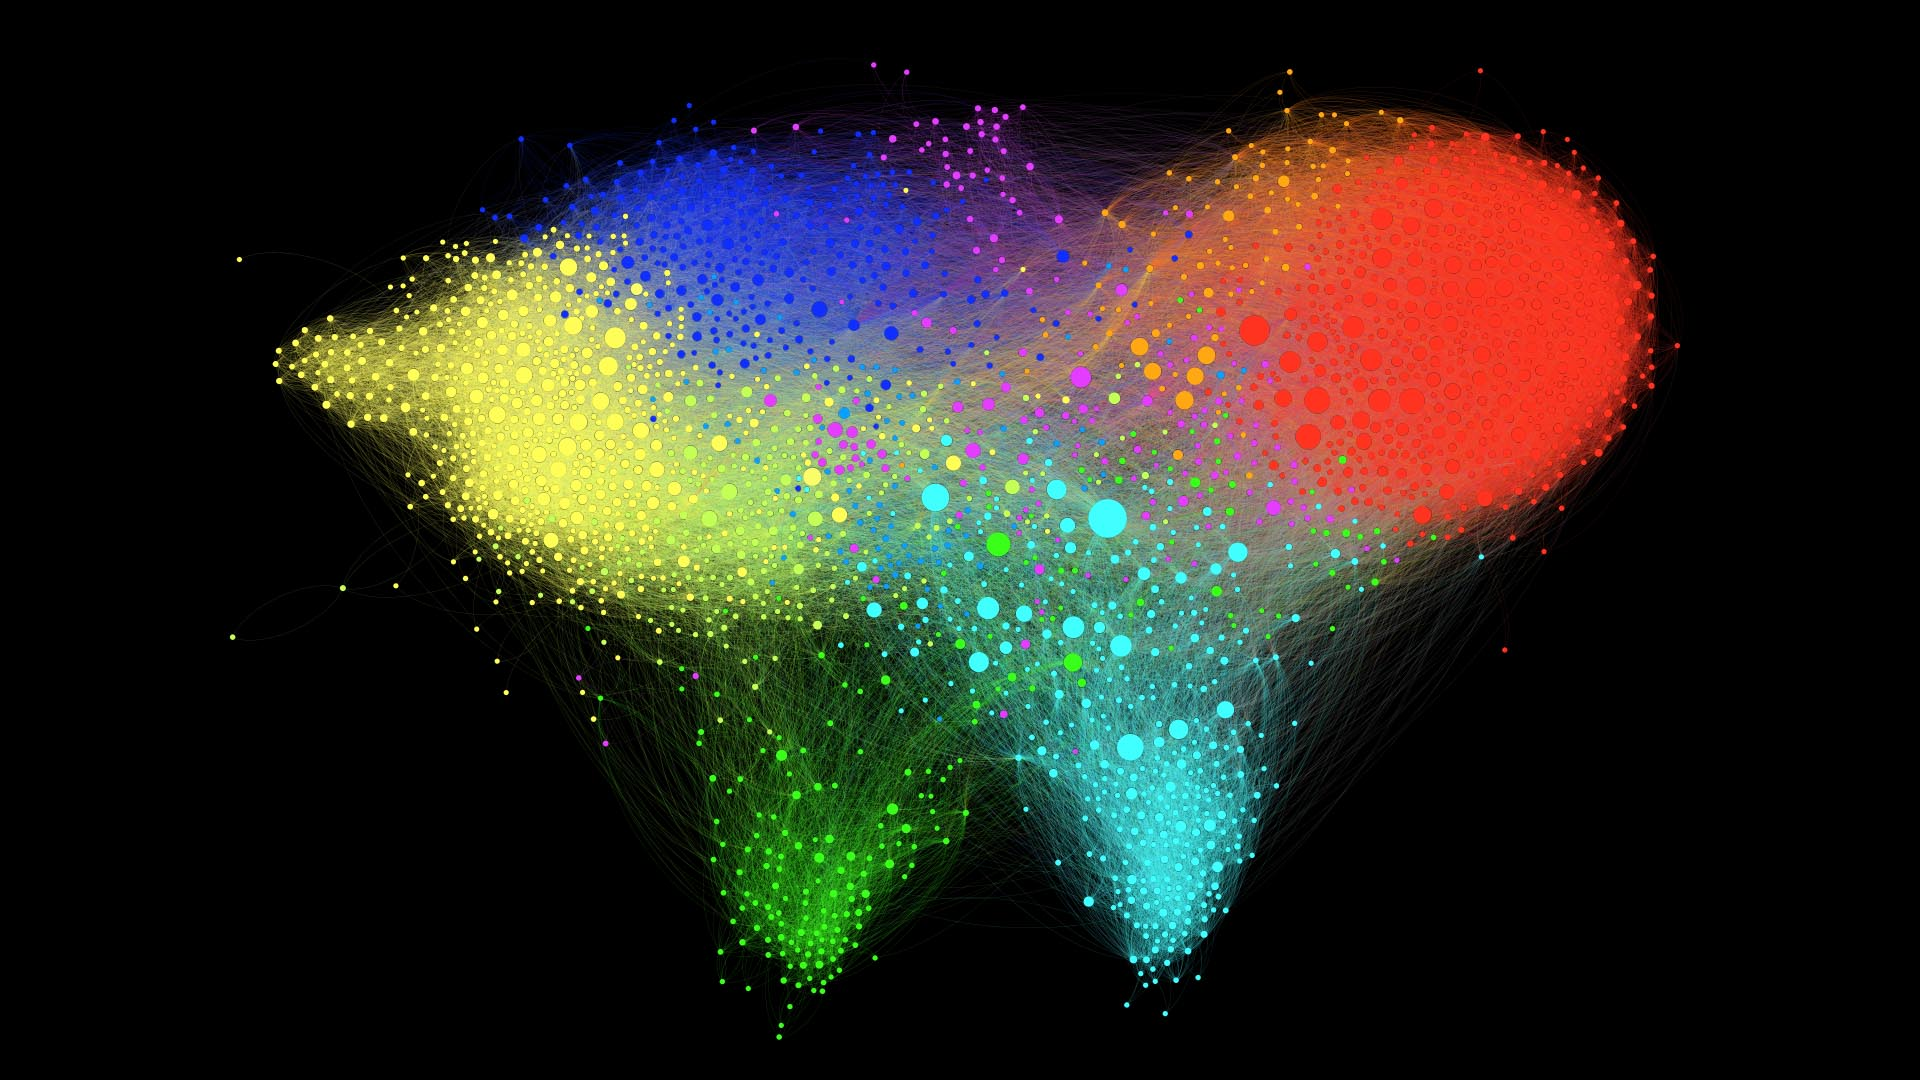

A modelagem de redes de conexões como a apresentada acima é conduzida por meio da estrutura de dados conhecida como **Grafo**, a qual será detalhada nas seções a seguir.

# Conceitos e Definições

Na sequência, serão apresentadas algumas definições a respeito de grafos.

**Definição 1 (<font color='blue'>Grafo</font>)**: Um ***grafo*** $G$ é uma dupla $(V,E)$ tal que $E \subset V\times V$.

**Notação**: $G = (V,E)$.

**Nomenclatura**: Os elementos de $V$ são denominados **vértices** e os elementos de $E$ são denominadas **arestas**.

**Observação**: Existem áreas de pesquisa que consideram os conjuntos $V$ e $E$ como sendo quaisquer conjuntos. Entretanto, neste material, considera-se $V$ como sendo um conjunto finito $V = \{v_1, v_2, ..., v_n\}$. Consequentemente, $E$ também é um conjunto finito.

**Definição 2 (<font color='blue'>Grafo Dirigido</font>)**: Seja $G = (V,E)$ um grafo.

(i) Se as arestas $(u,v)$ e $(v,u)$ representam a mesma conexão no grafo, então dizemos que o grafo é **não direcionado**, ou **não dirigido**. Nesse caso, a tupla $(u,v)$ não é um par ordenado, mas sim um par não ordenado.

(ii) Se as arestas $(u,v)$ e $(v,u)$ representam diferentes conexões no grafo, então dizemos que o grafo é **direcionado**, ou **dirigido**. Nesse caso, a tupla é um par ordenado.

**Representação Gráfica**: Representa-se um grafo de forma semelhante às árvores. Isto é, os vértices são círculos ou pontos e as conexões / arestas são ligações entre os vértices.

Por exemplo, na figura a seguir, está representado o grafo não orientado $G = (V,E)$ com $V = \{v_1,v_2,v_3,v_4\}$ e $E = \{(v_1,v_2), (v_2,v_4), (v_3,v_4), (v_1,v_3)\}$.

grafo_nao_direcionado.svg

No caso dos grafos direcionados, é comum representar a direção das arestas com setas direcionadas de acordo com a orientação das arestas.

Por exemplo, na figura a seguir, está representado o grafo não orientado $G = (V,E)$ com $V = \{v_1,v_2,v_3,v_4\}$ e $E = \{(v_1,v_2), (v_4,v_2), (v_3,v_1), (v_3,v_4)\}$.

grafo_direcionado.svg

**Definição 3 (<font color='blue'>Caminhos</font>)**: Seja $G = (V,E)$ um grafo com $V = \{v_1,v_2,v_3,..,v_n\}$. Considere $S = (v_{i_1}, v_{i_2}, ..., v_{i_m})$ uma sequência de $m$ vértices de $V$ tais que a aresta $(v_{i_k},v_{i_{k+1}})$ existe em $E$ para todo $k = 1,2,...,m-1$. Então:

(i) Diz-se que $S$ é um **caminho** em $G$.

(ii) Se $v_{i_1}=v_{i_m}$ e os demais vértices de $S$ são distintos entre si, então $S$ é um **caminho fechado** ou **ciclo** em $G$.

**Obs**.: No caso de $G$ ser um grafo direcionado, pode-se utilizar a nomenclatura **cadeia** para se referir a caminhos.

Na sequência, é apresentado um exemplo de caminho e de ciclo em um grafo.

caminhos.svg

**Definição 4 (<font color='blue'>Conexidade</font>)**:

(i) Seja $G = (V,E)$ um grafo não direcionado. Então, diz-se que $G$ é um **grafo conexo** se existe um caminho em $G$ entre todos os pares de vértices de $V$.

(ii) Seja $G = (V,E)$ um grafo direcionado. Então, diz-se que $G$ é um **grafo conexo** se o grafo $\bar{G} = (V,\bar{E})$, sendo $\bar{E}$ o conjunto $E$ considerado de forma não ordenada, for conexo.

**Obs.**: Para o caso de grafos direcionados, existem várias classes de conxidade. Por exemplo, grafos fortemente conexos são grafos direcionados tais que existe um caminho no grafo entre todos os seus pares de vértices.

Na figura a seguir, é apresentado um exemplo de grafo não dirigido conexo. Repare que existe um caminho entre todos os pares de vértices.

GRAFO_ND_CONEXO.svg

Na figura a seguir, é apresentado um exemplo de grafo não dirigido não conexo. Repare que não existe nenhum caminho possível entre H e B.

grafo_nd_nao_conexo.svg

Na figura a seguir, um exemplo de grafo dirigido conexo é apresentado. Repare que, originalmente, não existe caminho em $G$ entre muitos pares de vértices. Por exemplo, não existe caminho possível entre $B$ e $C$, pois não existe aresta indo de $C$ para $B$ e, consequentemente, nenhum conjunto de arestas que possibilite tais conexões. Entretanto, se a orientação das arestas for desconsiderada, o que resulta em $\bar{G}$, então a conexidade fica evidente. Sendo assim, $G$ é um grafo conexo.

grafo_direcionado_CONEXO.svg

**Definição 5 (<font color='blue'>Árvores</font>)**: Se $G$ é um grafo conexo sem ciclos, então $G$ é uma **árvore**.

Vale destacar que, de forma geral, uma árvore definida a partir de um grafo é sintaticamente diferente de uma árvore definida tal como a estrutura de dados das aulas passadas. Principalmente, se essa comparação for feita com respeito às árvores binárias e suas categorias.

arvore_ex.svg

**Definição 6 (<font color='blue'>Grafo Ponderado</font>)**: Um ***grafo ponderado*** é uma tripla $G = (V,E,w)$ tal que $V$ é o conjunto de vértices, $E \subset V\times V$ é o conjunto de arestas e $w:E\to\mathbb{R}$ é uma função chamada **função de ponderação**.

Vale destacar que um grafo ponderado é um grafo cujas arestas possuem uma atribuição numérica (peso). Na figura a seguir, é apresentado um grafo ponderado $G = (V,E,w)$. No caso, toma-se como exemplo que, $w((A,B)) = 6$.

grafo_ponderado.svg

# Representação Computacional

Grafos podem ser representados computacionalmente através de várias estruturas de dados diferentes. Neste curso, serão abordadas duas formas principais: a representação matricial e a representação em lista, detalhadas na sequência.


## Matriz de Adjacência

**Definição 7 (<font color='blue'>Matriz de adjacência</font>)**: Seja $G = (V,E)$ um grafo com $V = \{v_1,v_2,...,v_n\}$.


(i) Se $G$ for um grafo não ponderado, então, sua **matriz de adjacência** é definida como sendo $A := (a_{i,j})_{i,j = 1}^n$ tal que

$$a_{i,j} = \left\{\begin{matrix}1, &\text{ se a aresta }(v_i,v_j)\in E,\\0, & \text{ caso contrário.}\end{matrix}\right.$$

Na sequência, é representado um exemplo.

MATRIZ DE ADJACENCIA PARA GRAFO NAO PONDERADO.svg

(ii) Se $G = (V,E,w)$ for um grafo ponderado, então, sua **matriz de adjacência ponderada** é definida como sendo $W := (w_{i,j})_{i,j = 1}^n$ tal que

$$w_{i,j} = \left\{\begin{matrix}w(v_i,v_j), &\text{ se a aresta }(v_i,v_j)\in E,\\0, & \text{ caso contrário.}\end{matrix}\right.$$


Na sequência, é representado um exemplo.

MATRIZ DE ADJACENCIA PARA GRAFO PONDERADO.svg

Na sequência, segue um exemplo de representação para um grafo ponderado direcionado.

matriz_de_adj_grafo_direcionado.svg

**Importante**: Vale destacar que, para um grafo de $n$ vértices, uma matriz de adjacência ocupará na memória um valor proporcional a $n^2$ posições, uma para cada possível relacionamento entre os vértices. Se a matriz de adjacência for esparsa, pode ser conveniente utilizar estruturas de dados de matrizes esparsas, nas quais, apenas o valor sobre a aresta e os índices dos nó de entrada e de saída sejam armazenados, resultando em uma estrutura que requere $3m$ posições de memória, sendo $m$ o número de arestas do grafo.

##Lista de Adjacência

**Definição 8 (<font color='blue'>Lista de Adjacência</font>)**: Seja $G = (V,E,w)$ um grafo tal que $V = \{v_1,v_2,...,v_n\}$.

(i) Sejam $u$ e $v$ vértices em $V$. Diz-se que $u$ é **adjacente** a $v$ se, e somente se, $∃(v,u) \in E$.

(ii) Considere $\sigma:V\to \mathcal{P}(V)$ tal que $\sigma(v) = U \subset V$, sendo $U = \{u \in V : (v,u) \in E\}$. À $\sigma$ dá-se o nome de **lista de adjacência** dos vértices de $G$.

(iii) Define-se como lista de adjacência de $G$ a sequência $(σ(v_1), \sigma(v_2), ..., \sigma(v_n))$.

Na sequência, são apresentadas as listas de adjacências de todos os vértices de um grafo de exemplo. Repare que, como o grafo não é dirigido, todos os vértices que se conectam com um dado vértice referência são considerados adjacentes.

lista_de_adj1.svg

Com respeito a grafos direcionados, vale destacar que apenas os vértices que 'recebem' uma aresta direcionada a partir de outro vértice são considerados adjacentes.

lista_de_adj2.svg

**Importante**: Repare que, neste caso, se a organização das listas de adjacencias de um grafo for feita por listas, então a armazenagem é feita para cada vértice sem desperdício de posição na memória, tal como é feito com a representação matricial.

# Árvore Geradora Mínima


**Definição 9 (<font color='blue'>Subgrafo</font>)**: Um ***subgrafo*** de um grafo $G = (V,E)$ é um grafo $G' = (V',E')$ tal que $V'\subset V$ e $E'\subset E$.

Na figura a seguir, o grafo definido pelos vértices e arestas coloridos em azul é um subgrafo do grafo formado por todos os vértices e arestas da representação.

subgrafo.svg

**Definição 10 (<font color='blue'>Árvores Geradoras</font>)**: Uma ***árvore geradora*** de um grafo $G=(V,E)$ é um subgrafo $G' = (V',E')$ que é uma árvore e que possui os mesmos vértices de $G$, isto é, $V'=V$.

Na sequência, é apresentado um grafo $G = (V,E)$ e uma de suas árvore geradoras.

MST1.svg

**Importante**: Repare que podem existir várias árvores geradoras para um mesmo grafo. Ao mesmo tempo que pode não existir uma árvore geradora para um grafo. Por exemplo, se um grafo não é conexo, não existe um subgrafo do mesmo que seja uma árvore, uma vez que este fato é um conflito da própria definição de árvore. Entretanto, no caso do grafo ser conexo, sempre haverá uma árvore geradora, tal como destacado pelo Teorema a seguir.

**Teorema 1**: Se um grafo é conexo então o mesmo possui, pelo menos, uma árvore geradora.

**Definição 11 (<font color='blue'>Árvores Geradoras Mínimas</font>)**: Seja $G = (V,E, w)$ um grafo ponderado conexo e $\mathcal{A} = \{A_i = (V,E_i)\}$ o conjunto de suas árvores geradoras. A árvore $A = A_i$ tal que a soma $\sum_{e \in E_i} w(e)$ seja a mínima possível é chamada de **árvore geradora mínima**, ou *minimum spanning tree* (MST), de $G$. Matematicamente,

$$A := \text{arg}\min_{A_i \in \mathcal{A}} \sum_{e \in E_i} w(e).$$

Por exemplo, considere o grafo $G$ representado a seguir e três de suas árvores geradoras: $A_1, A_2$ e $A_3$. Vale destacar como que as somas dos pesos dessas árvores diferem, sendo a árvore $A_3$ a árvore geradora mínima, uma vez que a mesma é definida pelas três arestas mais leves no grafo.

MST2.svg

### Algoritmo de Prim

Como um grafo pode apresentar várias árvores geradoras, é necessário definir uma rotina de avaliações para se detectar qual dessas árvores é uma árvore geradora mínima. Um dos algoritmos mais bem estabelecidos para essa tarefa é o algoritmo de Prim, que consiste em um algoritmo do tipo guloso que define um caminho sem ciclos entre os vértices de um grafo a partir de um vértice que deve ser considerado a raiz da árvore. Em detalhes, suponha-se que $G = (V,E,w)$ seja um grafo ponderado. Então, a subrotina para determinar a árvore geradora mínima de acordo com Prim é dado pelo algoritmo a seguir.

In [ ]:
# Função que detecta os vértices adjacentes de um dado vértice em G ------------
def adjacentes(v, G):
  (V, E, w) = G
  adj = []
  for aresta in E: # Conferir em todas as arestas
    (pred, suc) = aresta
    if v == pred: # Se a aresta é tal que v é o primeiro vértice
      adj.append(suc) # Então suc é seu sucessor / adjacente
  return adj # Lista de adjacentes
# ------------------------------------------------------------------------------

# Função dedicada a retirar o vértice de menor chave de Q ----------------------
def retire_vertice_menor_chave(Q):
  menor_vertice = list(Q.keys())[0]
  menor_chave   = Q[menor_vertice]

  # Busca pela menor chave
  for vertice in Q:
    chave = Q[vertice]
    if chave < menor_chave:
      menor_chave   = chave
      menor_vertice = vertice

  # Retirada do vértice do dicionário
  chave_x_valor = Q.pop(menor_vertice)
  return menor_vertice
# ------------------------------------------------------------------------------

# Algoritmo de Prim para detecção de árvore geradora mínima --------------------
from math import inf
def Prim(G, raiz):
  (V,E,w) = G
  chave = {}
  predecessor = {}
  for v in V:
      chave[v] = inf
      predecessor[v] = ''

  chave[raiz] = 0
  Q = {v:chave[v] for v in V} # Fila de prioridade: menor a chave -> maior a prioridade
  while len(Q) > 0:
    v = retire_vertice_menor_chave(Q)
    print('---------',v,'-----------')
    for u in adjacentes(v, G):
      if u in Q and w(v,u) < chave[u]:
        print('Antes: w(',v,',',u,') = ',w(v,u),' e chave[',u,'] = ',chave[u])
        predecessor[u] = v
        chave[u] = w(v,u)
        Q[u] = chave[u]
        print('Depois: w(',v,',',u,') = ',w(v,u),' e chave[',u,'] = ',chave[u])

  return predecessor, chave

  # Agora basta detectar a árvore a partir dos caminhos formados entre os
  # vértices, uma vez que é sabido que é o predecessor de cada vértice e que a
  # árvore deve começar no vértice raíz
# ------------------------------------------------------------------------------

Na sequência, é apresentado o passo-a-passo desse algoritmo sobre um grafo $G = (\{A,B,C,D,E,F\}, \mathcal{E}, w)$.

prim.svg

Finalmente, obtém-se a seguinte MST, cujas arestas estão destacadas na coloração verde na representação:

prim2.svg

In [ ]:
V = ['A', 'B', 'C', 'D', 'E', 'F']
E = [           ('A','B'), ('A','C'), ('A','D'),            ('A','F'),
     ('B','A'),            ('B','C'),            ('B','E'),
     ('C','A'), ('C','B'),            ('C','D'),            ('C','F'),
     ('D','A'),            ('D','C'),            ('D','E'), ('D','F'),
                ('E','B'),            ('E','D'),            ('E','F'),
     ('F','A'),            ('F','C'), ('F','D'), ('F','E')]

W = [10,5,20,10,
     10, 10, 10,
     5,10,20,5,
     20,20,5,4,
     10,5,3,
     10,5,4,3]

def w(u,v):
  return W[E.index((u,v))]

G = (V,E,w)

In [ ]:
predecessor, chave = Prim(G,'A')

--------- A -----------
Antes: w( A , B ) =  10  e chave[ B ] =  inf
Depois: w( A , B ) =  10  e chave[ B ] =  10
Antes: w( A , C ) =  5  e chave[ C ] =  inf
Depois: w( A , C ) =  5  e chave[ C ] =  5
Antes: w( A , D ) =  20  e chave[ D ] =  inf
Depois: w( A , D ) =  20  e chave[ D ] =  20
Antes: w( A , F ) =  10  e chave[ F ] =  inf
Depois: w( A , F ) =  10  e chave[ F ] =  10
--------- C -----------
Antes: w( C , F ) =  5  e chave[ F ] =  10
Depois: w( C , F ) =  5  e chave[ F ] =  5
--------- F -----------
Antes: w( F , D ) =  4  e chave[ D ] =  20
Depois: w( F , D ) =  4  e chave[ D ] =  4
Antes: w( F , E ) =  3  e chave[ E ] =  inf
Depois: w( F , E ) =  3  e chave[ E ] =  3
--------- E -----------
--------- D -----------
--------- B -----------


In [ ]:
predecessor, chave

({'A': '', 'B': 'A', 'C': 'A', 'D': 'F', 'E': 'F', 'F': 'C'},
 {'A': 0, 'B': 10, 'C': 5, 'D': 4, 'E': 3, 'F': 5})

# Algoritmo de Djikstra

Em diversas situações modeladas por um grafo ponderado, pode ser interessante detectar um caminho de menor custo entre dois vértices. Por exemplo, suponha que seja necessário transportar uma elevada quantidade de madeira entre dois pátios localizados em Estados diferentes e que exista vários caminhos possíveis entre tais empreendimentos. Estes caminhos representam ligações por rodovias entre cidades. Claramente, é possível modelar este problema por um grafo ponderado no qual os vértices representam as cidades, as arestas representam as rodovias entre as cidades e a distância entre as cidades definem o peso do grafo. Finalmente, espera-se calcular neste grafo qual seria o menor caminho entre os pátios citados.


djikstra1.svg


Um dos algoritmos mais importantes da Ciência da Computação é o Algoritmo de Djikstra. Esse algoritmo se dedica a encontrar o caminho de menor custo entre dois vértices de um grafo ponderado. Seu funcionamento é muito semelhante ao funcionamento do algoritmo de Prim, com a ressalva de que a atualização da chave de cada vértice é feito de acordo com um somatório entre a chave atual do vértice e a chave do vértice adjacente, sendo esta atualização conhecida como etapa de relaxação.

In [ ]:
def Djikstra(G,raiz):
  (V,E,w) = G
  chave = {}
  predecessor = {}
  for v in V:
      chave[v] = inf
      predecessor[v] = ''

  chave[raiz] = 0
  Q = {v:chave[v] for v in V}
  while len(Q) > 0:
    v = retire_vertice_menor_chave(Q)
    print('---------',v,'-----------')
    for u in adjacentes(v, G):

      d = chave[v] + w(v,u)
      if d < chave[u]: # Relaxação
        print('Antes: w(',v,',',u,') = ',w(v,u),' e chave[',u,'] = ',chave[u])
        predecessor[u] = v
        chave[u] = d
        Q[u] = d
        print('Depois: w(',v,',',u,') = ',w(v,u),' e chave[',u,'] = ',chave[u])

  return predecessor, chave


Na sequência, é apresentado o passo-a-passo desse algoritmo sobre um grafo $G = (\{A,B,C,D,E,F\}, \mathcal{E}, w)$.

djikstra1.svg

In [ ]:
V = ['A', 'B', 'C', 'D', 'E', 'F']
E = [           ('A','B'), ('A','C'), ('A','D'),            ('A','F'),
     ('B','A'),            ('B','C'),            ('B','E'),
     ('C','A'), ('C','B'),            ('C','D'),            ('C','F'),
     ('D','A'),            ('D','C'),            ('D','E'), ('D','F'),
                ('E','B'),            ('E','D'),            ('E','F'),
     ('F','A'),            ('F','C'), ('F','D'), ('F','E')]

W = [10,5,20,11,
     10, 10, 10,
     5,10,5,5,
     20,5,5,4,
     10,5,3,
     11,5,4,3]

def w(u,v):
  return W[E.index((u,v))]

G = (V,E,w)


predecessor, chave = Djikstra(G,'A')

--------- A -----------
Antes: w( A , B ) =  10  e chave[ B ] =  inf
Depois: w( A , B ) =  10  e chave[ B ] =  10
Antes: w( A , C ) =  5  e chave[ C ] =  inf
Depois: w( A , C ) =  5  e chave[ C ] =  5
Antes: w( A , D ) =  20  e chave[ D ] =  inf
Depois: w( A , D ) =  20  e chave[ D ] =  20
Antes: w( A , F ) =  11  e chave[ F ] =  inf
Depois: w( A , F ) =  11  e chave[ F ] =  11
--------- C -----------
Antes: w( C , D ) =  5  e chave[ D ] =  20
Depois: w( C , D ) =  5  e chave[ D ] =  10
Antes: w( C , F ) =  5  e chave[ F ] =  11
Depois: w( C , F ) =  5  e chave[ F ] =  10
--------- B -----------
Antes: w( B , E ) =  10  e chave[ E ] =  inf
Depois: w( B , E ) =  10  e chave[ E ] =  20
--------- D -----------
Antes: w( D , E ) =  5  e chave[ E ] =  20
Depois: w( D , E ) =  5  e chave[ E ] =  15
--------- F -----------
Antes: w( F , E ) =  3  e chave[ E ] =  15
Depois: w( F , E ) =  3  e chave[ E ] =  13
--------- E -----------


In [ ]:
predecessor, chave

({'A': '', 'B': 'A', 'C': 'A', 'D': 'C', 'E': 'F', 'F': 'C'},
 {'A': 0, 'B': 10, 'C': 5, 'D': 10, 'E': 13, 'F': 10})

# Buscas em Grafos

De forma semelhante ao que fizemos em todas as estruturas de dados apresentadas neste curso, em muitas situações é interessante verificar se um certo elemento está inserido na estrutura. Especificamente, é preciso definir rotinas de busca e verificação sobre os vértices de um grafo.

Vale destacar que, quando um grafo não está representado computacionalmente em sua forma matemática $G = (V,E,w)$, mas sim por uma matriz ou por uma lista de adjacências, então é preciso definir uma rotina de varredura entre seus vértices utilizando as relações/arestas que o definem. Além disso, as rotinas de busca têm por objetivo definir quem são os predecessores de cada vértice e de estabelecer a distância entre um vértice raiz e os demais.

Para isso, existe uma série de técnicas de conferência e de definição de percurso em grafos. Neste curso, vamos ver as duas mais conhecidas: a busca em largura e a busca em profundidade.

## Busca em Largura


Uma busca em largura, ou *Breadth-First Search* (BFS), é a busca definida em níveis, estabelecidos a partir de um vértice raiz, do grafo. Isto é, a busca é inicializada em um vértice tido como raiz e, na sequência, seus filhos são avaliados. Na sequência, os filhos de seus filhos. E assim por diante. Tal como representado pela figura a seguir, sendo a ordem de verificação representada pelas setas seccionadas azuis.

bfs.svg

Para controlar essa ordem de verificação, utiliza-se uma estrutura de dados do tipo fila, na qual, os filhos dos vértices visitados vão sendo adicionados. Na condução da busca, o vértice no começo da fila é visitado e seus filhos são enfileirados na estrutura até que as verificações terminem. Com a única ressalva de que cada vértice pode entrar na fila uma única vez. Assim, obtém-se o seguinte algoritmo:


In [ ]:
def push_fila(Q, elemento):
  Q.insert(0,elemento)

def pop_fila(Q):
  return Q.pop(-1)

from math import inf
def BFS(G, raiz, valor_procurado):
  (V,E,w) = G
  existe = False
  distancia = {}
  predecessor = {}
  cores = {}
  for v in V:
      distancia[v] = inf
      predecessor[v] = ''
      cores[v] = 'BRANCO'

  lista_de_visitacao = []
  distancia[raiz] = 0
  cores[raiz] ='CINZA'
  Q = [] # Fila Vazia
  push_fila(Q,raiz) # Insere a raiz na fila
  while len(Q) > 0:

    v = pop_fila(Q) # Remove o elemento mais antigo da estrutura

    if v == valor_procurado: # Verifica a existência
      existe = True

    cores[v] = 'PRETO' # Vértice já visitado
    lista_de_visitacao.append(v)

    print('---------',v,'-----------')
    for u in adjacentes(v, G):

      if cores[u] == 'BRANCO': # Vértice ainda não visitado
        distancia[u] = distancia[v] + 1 # Acumula a distância
        predecessor[u] = v # Atualiza o predecessor

        cores[u] = 'CINZA' # Vértice já considerado
        push_fila(Q,u)     # Enfileira



  return distancia, predecessor, existe, lista_de_visitacao


Na sequência, é apresentado um exemplo do passo-a-passo da técnica sobre um grafo $G$ de 7 vértices.

exemplo bfs.svg

In [ ]:
V = ['A','B','C','D','E','F','G']
E = [('A','B'), ('B','A'), ('A','C'), ('C','A'), ('A','D'),
     ('B','E'), ('E','B'), ('C','E'), ('E','C'), ('C','F'), ('F','C'), ('D','F'), ('F','D'),
     ('F','G'), ('G','F')]
W = [1,1,1,1,1,
     1,1,1,1,1,1,1,1,
     1,1]

def w(u,v):
  return W[E.index((u,v))]

G = (V,E,w)

In [ ]:
distancia, predecessor, existe, lista_de_visitacao = BFS(G, 'A', 'G')

--------- A -----------
--------- B -----------
--------- C -----------
--------- D -----------
--------- E -----------
--------- F -----------
--------- G -----------


In [ ]:
lista_de_visitacao

['A', 'B', 'C', 'D', 'E', 'F', 'G']

## Busca em Profundidade

Uma outra forma de se conduzir uma busca por elementos em um grafo é a busca em profundidade, ou *Depth-First Search* (DFS), na qual a visitação dos vértices é feita tendo os vértices adjacentes ao vértice corrente como preferenciais na visitação. Em outras palavras, sempre que possível é necessário visitar o filho do vértice corrente e não os irmãos, como foi feito na BFS. Para isso, uma estrutura de dados do tipo pilha é utilizada para controlar a ordem de visitação dos vértices. Na figura a seguir, uma representação dessa estratégia é apresentada. Repare que a ordem de visitação é definida no caminho entre vértice-pai e vértice-filho.

dfs.svg

Na sequência, o código que simula uma pesquisa de acordo com a estratégia DFS em um grafo é apresentado.

In [ ]:
def push_pilha(Q, elemento):
  Q.insert(0,elemento)

def pop_pilha(Q):
  return Q.pop(0)

from math import inf
def DFS(G,raiz, valor_procurado):
  (V,E,w) = G
  existe = False
  distancia = {}
  predecessor = {}
  cores = {}
  for v in V:
      distancia[v] = inf
      predecessor[v] = ''
      cores[v] = 'BRANCO'

  distancia[raiz] = 0
  cores[raiz] ='CINZA'
  Q = [] # Fila Vazia
  lista_de_visitacao = []
  push_pilha(Q,raiz) # Insere a raiz na pilha
  while len(Q) > 0:

    v = pop_pilha(Q) # Remove o elemento mais recente da estrutura

    if v == valor_procurado: # Verifica a existência
      existe = True

    cores[v] = 'PRETO' # Vértice já visitado
    lista_de_visitacao.append(v)


    print('---------',v,'-----------')
    for u in adjacentes(v, G):

      if cores[u] == 'BRANCO': # Vértice ainda não visitado
        distancia[u] = distancia[v] + 1 # Acumula a distância
        predecessor[u] = v # Atualiza o predecessor

        cores[u] = 'CINZA' # Vértice já considerado
        push_pilha(Q,u)     # Empilha



  return distancia, predecessor, existe, lista_de_visitacao

Na sequência, é apresentado um exemplo de funcionamento dessa estratégia de busca. Vale destacar que o grafo utilizado é o mesmo que foi utilizado na estratégia de busca anterior.

dfs exemplo.svg

Repare que a ordem de visitação se dá em profundidade. Isto é, visita-se o filho vértice sempre que possível.

Na sequência, a execução do código apresentado para efetuação da DFS é executado no grafo do exemplo.

In [ ]:
V = ['A','B','C','D','E','F','G']
E = [('A','B'), ('B','A'), ('A','C'), ('C','A'), ('A','D'),
     ('B','E'), ('E','B'), ('C','E'), ('E','C'), ('C','F'), ('F','C'), ('D','F'), ('F','D'),
     ('F','G'), ('G','F')]
W = [1,1,1,1,1,
     1,1,1,1,1,1,1,1,
     1,1]

def w(u,v):
  return W[E.index((u,v))]

G = (V,E,w)

In [ ]:
distancia, predecessor, existe, lista_de_visitacao = DFS(G, 'A', 'G')

--------- A -----------
--------- D -----------
--------- F -----------
--------- G -----------
--------- C -----------
--------- E -----------
--------- B -----------


In [ ]:
lista_de_visitacao

['A', 'D', 'F', 'G', 'C', 'E', 'B']